In [8]:
# Cell 1: Imports and Path Definition
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

KAGGLEHUB_DOWNLOAD_BASE_PATH = r"C:\Users\Swastik\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1"
ACTUAL_DATA_FOLDER_PATH = os.path.join(KAGGLEHUB_DOWNLOAD_BASE_PATH, "Data")
CSV_PATH = os.path.join(ACTUAL_DATA_FOLDER_PATH, "features_3_sec.csv")

In [3]:
# Cell 2: Load Data and Initial Inspection
import os
import pandas as pd

# --- Paths from Cell 1 (assuming Cell 1 ran successfully) ---
KAGGLEHUB_DOWNLOAD_BASE_PATH = r"C:\Users\Swastik\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1"
ACTUAL_DATA_FOLDER_PATH = os.path.join(KAGGLEHUB_DOWNLOAD_BASE_PATH, "Data")
CSV_PATH = os.path.join(ACTUAL_DATA_FOLDER_PATH, "features_3_sec.csv")
# --- End Paths ---

print(f"Attempting to load CSV from: {CSV_PATH}")

# Check if the base directory exists
if not os.path.exists(KAGGLEHUB_DOWNLOAD_BASE_PATH):
    print(f"ERROR: Base KaggleHub download path does NOT exist: {KAGGLEHUB_DOWNLOAD_BASE_PATH}")
    df = None
# Check if the 'Data' subfolder exists
elif not os.path.exists(ACTUAL_DATA_FOLDER_PATH):
    print(f"ERROR: 'Data' subfolder does NOT exist in {KAGGLEHUB_DOWNLOAD_BASE_PATH}")
    df = None
# Check if the CSV file itself exists
elif not os.path.exists(CSV_PATH):
    print(f"ERROR: CSV file does NOT exist at {CSV_PATH}")
    df = None
else:
    print(f"SUCCESS: CSV file found at {CSV_PATH}")
    try:
        df = pd.read_csv(CSV_PATH)
        print("SUCCESS: pandas.read_csv executed.")
        
        if df is not None and not df.empty:
            print("\nDataFrame Head:")
            print(df.head())
            print("\nDataFrame Info:")
            df.info()
            print("\nDataFrame Shape:")
            print(df.shape)
            print("\nLabel value counts:")
            if 'label' in df.columns:
                print(df['label'].value_counts())
            else:
                print("'label' column not found in DataFrame.")
        elif df is not None and df.empty:
            print("WARNING: CSV loaded, but the DataFrame is empty.")
        else:
            print("ERROR: pandas.read_csv seemed to run but df is None.")
            
    except Exception as e:
        print(f"ERROR during pandas.read_csv: {e}")
        df = None


if df is None:
    print("\n--- df is None. Cell 3 will not run correctly. Please fix issues in Cell 2. ---")

Attempting to load CSV from: C:\Users\Swastik\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1\Data\features_3_sec.csv
SUCCESS: CSV file found at C:\Users\Swastik\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1\Data\features_3_sec.csv
SUCCESS: pandas.read_csv executed.

DataFrame Head:
            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777  

In [4]:
# Cell 3: Drop Unnecessary Columns

if df is not None:
    columns_to_drop = []
    
    # Check and add 'filename' if it exists
    if 'filename' in df.columns:
        columns_to_drop.append('filename')
        print("'filename' column found and will be dropped.")
        
    # Check and add 'length' if it exists
    if 'length' in df.columns:
        columns_to_drop.append('length')
        print("'length' column found and will be dropped.")
        
    # 'Unnamed: 0' was NOT found in your df.info(), so we don't need to check for it.
    # If you were using a different CSV that had it, you would add:
    # if 'Unnamed: 0' in df.columns:
    #     columns_to_drop.append('Unnamed: 0')

    if columns_to_drop:
        print(f"\nIdentified columns to drop: {columns_to_drop}")
        df_original_shape = df.shape
        df = df.drop(columns=columns_to_drop)
        print(f"Original DataFrame shape: {df_original_shape}")
        print(f"New DataFrame shape after dropping: {df.shape}")
        
        print("\nDataFrame after dropping columns:")
        print(df.head(2)) # Print just a couple of rows to see remaining columns
        # df.info() # You can uncomment this to see the full info again
    else:
        print("\nNo columns ('filename', 'length') were found to drop.")
else:
    print("DataFrame not loaded, skipping column drop.")

'filename' column found and will be dropped.
'length' column found and will be dropped.

Identified columns to drop: ['filename', 'length']
Original DataFrame shape: (9990, 60)
New DataFrame shape after dropping: (9990, 58)

DataFrame after dropping columns:
   chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0          0.335406         0.091048  0.130405  0.003521   
1          0.343065         0.086147  0.112699  0.001450   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   

   spectral_bandwidth_var  rolloff_mean   rolloff_var  ...  mfcc16_var  \
0           117335.771563   3714.560359  1.080790e+06  ...   39.687145   
1            65671.875673   3869.682242  6.722448e+05  ...   64.748276   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.48824

In [5]:
# Cell 4: Handle Missing Values (if any)

if df is not None:
    print("Missing values per column (showing only columns with NaNs):")
    missing_values = df.isnull().sum()
    # Only print columns that actually have missing values
    print(missing_values[missing_values > 0].sort_values(ascending=False)) 
    
    if missing_values[missing_values > 0].empty:
        print("\nGreat! No missing values found in any columns after dropping unnecessary ones.")
    else:
        print("\nMissing values ARE present. You might need to uncomment imputation/dropping logic below.")
        # --- DECISION POINT: How to handle missing values? ---
        # Option 1: Drop rows with any NaN values (use if NaNs are few and random)
        # print(f"\nShape before dropping NaNs: {df.shape}")
        # df = df.dropna()
        # print(f"Shape after dropping NaNs: {df.shape}")

        # Option 2: Impute missing values (e.g., with mean for numeric columns)
        # numeric_cols_with_nan = df.select_dtypes(include=np.number).isnull().any()
        # cols_to_impute = numeric_cols_with_nan[numeric_cols_with_nan].index.tolist()

        # if cols_to_impute:
        #     print(f"\nImputing missing values with mean for columns: {cols_to_impute}")
        #     for col in cols_to_impute:
        #         df[col] = df[col].fillna(df[col].mean())
            
        #     print("\nMissing values per column after imputation (should be 0 for imputed cols):")
        #     missing_values_after = df.isnull().sum()
        #     print(missing_values_after[missing_values_after > 0].sort_values(ascending=False))
        # else:
        #     print("\nNo numeric columns with missing values found to impute (or all NaNs already handled).")

    # Final check for feature columns (excluding 'label' for now)
    feature_columns = df.columns.tolist()
    if 'label' in feature_columns:
        feature_columns.remove('label') # Temporarily remove label for this check
    
    if df[feature_columns].isnull().sum().sum() == 0:
        print("\nConfirmed: No missing values remain in feature columns.")
    else:
        print("\nWARNING: Missing values still present in feature columns. Review imputation.")
        print(df[feature_columns].isnull().sum()[df[feature_columns].isnull().sum() > 0])
else:
    print("DataFrame not loaded, skipping missing value handling.")

Missing values per column (showing only columns with NaNs):
Series([], dtype: int64)

Great! No missing values found in any columns after dropping unnecessary ones.

Confirmed: No missing values remain in feature columns.


In [9]:
# Cell 5: Encode Labels

if df is not None:
    # Ensure the 'label' column exists
    if 'label' not in df.columns:
        print("ERROR: 'label' column not found in DataFrame. Cannot encode labels.")
        # If this error occurs, something went wrong in previous steps or CSV structure.
        X, y, label_mapping, encoder = None, None, None, None 
    else:
        encoder = LabelEncoder()
        # Ensure 'label' column is treated as string, in case of mixed types or numbers misinterpreted as strings
        df['label_encoded'] = encoder.fit_transform(df['label'].astype(str)) 

        # Store the mapping for later reference (genre name to number)
        label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
        print("\nLabel Mapping (Genre to Number):")
        print(label_mapping) # This shows you which number corresponds to which genre

        # Separate features (X) and target (y)
        y = df['label_encoded']
        X = df.drop(columns=['label', 'label_encoded']) # Drop original text label and new encoded label from features

        print("\nShape of X (features):", X.shape) # Should be (9990, 57)
        print("Shape of y (labels):", y.shape)   # Should be (9990,)
        
        print("\nFirst 5 rows of X (features):")
        print(X.head())
        print("\nFirst 5 values of y (labels):")
        print(y.head()) # Shows the numerically encoded labels
else:
    print("DataFrame (df) is None, skipping label encoding.")
    X, y, label_mapping, encoder = None, None, None, None


Label Mapping (Genre to Number):
{'blues': np.int64(0), 'classical': np.int64(1), 'country': np.int64(2), 'disco': np.int64(3), 'hiphop': np.int64(4), 'jazz': np.int64(5), 'metal': np.int64(6), 'pop': np.int64(7), 'reggae': np.int64(8), 'rock': np.int64(9)}

Shape of X (features): (9990, 57)
Shape of y (labels): (9990,)

First 5 rows of X (features):
   chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0          0.335406         0.091048  0.130405  0.003521   
1          0.343065         0.086147  0.112699  0.001450   
2          0.346815         0.092243  0.132003  0.004620   
3          0.363639         0.086856  0.132565  0.002448   
4          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613      

In [10]:
# Cell 6: Split Data into Training and Test Sets

# Ensure X and y exist from Cell 5
if 'X' in locals() and X is not None and 'y' in locals() and y is not None:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.25,     # Using 25% of the data for the test set
        random_state=42,    # Ensures that the split is the same every time you run the code (reproducibility)
        stratify=y          # CRITICAL for classification: ensures that the proportion of each genre is roughly the same in both train and test sets
    )

    print("\nX_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

    print("\nClass distribution in y_train (normalized %):")
    print(pd.Series(y_train).value_counts(normalize=True).sort_index() * 100) # Multiply by 100 for percentage
    print("\nClass distribution in y_test (normalized %):")
    print(pd.Series(y_test).value_counts(normalize=True).sort_index() * 100) # Multiply by 100 for percentage
    
    # For reference, let's see the mapping again if you have it
    if 'label_mapping' in locals():
        print("\nReminder of Label Mapping:")
        print(label_mapping)
else:
    print("ERROR: X and/or y are not defined or are None. Please ensure Cell 5 ran successfully.")
    # Define these as None so later cells can check
    X_train, X_test, y_train, y_test = None, None, None, None 


X_train shape: (7492, 57)
X_test shape: (2498, 57)
y_train shape: (7492,)
y_test shape: (2498,)

Class distribution in y_train (normalized %):
label_encoded
0    10.010678
1     9.983983
2     9.983983
3     9.997330
4     9.997330
5    10.010678
6    10.010678
7    10.010678
8    10.010678
9     9.983983
Name: proportion, dtype: float64

Class distribution in y_test (normalized %):
label_encoded
0    10.008006
1    10.008006
2     9.967974
3    10.008006
4     9.967974
5    10.008006
6    10.008006
7    10.008006
8    10.008006
9    10.008006
Name: proportion, dtype: float64

Reminder of Label Mapping:
{'blues': np.int64(0), 'classical': np.int64(1), 'country': np.int64(2), 'disco': np.int64(3), 'hiphop': np.int64(4), 'jazz': np.int64(5), 'metal': np.int64(6), 'pop': np.int64(7), 'reggae': np.int64(8), 'rock': np.int64(9)}


In [11]:
# Cell 7: Scale Features

# Ensure X_train and X_test exist from Cell 6
if 'X_train' in locals() and X_train is not None and 'X_test' in locals() and X_test is not None:
    scaler = StandardScaler()

    # Fit the scaler ONLY on the training data (X_train)
    # This learns the mean and standard deviation from the training data.
    X_train_scaled = scaler.fit_transform(X_train)

    # Apply the SAME fitted scaler to transform the test data (X_test)
    # We use the parameters learned from X_train to ensure no data leakage from X_test into the training process.
    X_test_scaled = scaler.transform(X_test)

    print("\nOriginal X_train (first sample, first 5 features):")
    # Using .iloc to access rows/columns by position, then .values to get numpy array for cleaner print
    print(X_train.iloc[0, :5].values) 
    
    print("\nScaled X_train_scaled (first sample, first 5 features):")
    print(X_train_scaled[0, :5])

    print("\nMean of first 5 features in X_train_scaled (should be close to 0):")
    # Using np.mean from numpy (ensure numpy is imported as np from Cell 1)
    print(np.mean(X_train_scaled[:, :5], axis=0)) 
    
    print("\nStandard deviation of first 5 features in X_train_scaled (should be close to 1):")
    print(np.std(X_train_scaled[:, :5], axis=0))
    
    # Sanity check for X_test_scaled
    print("\nMean of first 5 features in X_test_scaled (will NOT be exactly 0):")
    print(np.mean(X_test_scaled[:, :5], axis=0))
    
    print("\nStandard deviation of first 5 features in X_test_scaled (will NOT be exactly 1):")
    print(np.std(X_test_scaled[:, :5], axis=0))

else:
    print("ERROR: X_train and/or X_test are not defined or are None. Please ensure Cell 6 ran successfully.")
    # Define these as None so later cells can check
    X_train_scaled, X_test_scaled, scaler = None, None, None


Original X_train (first sample, first 5 features):
[4.46722567e-01 8.83222595e-02 1.00575842e-01 2.20220792e-03
 2.06743183e+03]

Scaled X_train_scaled (first sample, first 5 features):
[ 0.74749429  0.35260445 -0.45106206 -0.13688224 -0.17652646]

Mean of first 5 features in X_train_scaled (should be close to 0):
[-1.94422398e-16 -1.36759560e-15 -2.06751624e-16 -7.30269496e-17
  2.73139760e-16]

Standard deviation of first 5 features in X_train_scaled (should be close to 1):
[1. 1. 1. 1. 1.]

Mean of first 5 features in X_test_scaled (will NOT be exactly 0):
[ 0.00941231 -0.01158018 -0.03470665 -0.01838758 -0.00751739]

Standard deviation of first 5 features in X_test_scaled (will NOT be exactly 1):
[1.01287168 0.97598461 1.00464293 1.00087931 0.98520383]


In [12]:
# Cell 8: Import Models and Metrics, Define Evaluation Function

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier # Another option
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time # To time model training

# For plotting confusion matrix later
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm) # You can print the matrix values if you want

    plt.figure(figsize=(10, 8)) # Adjust figure size as needed
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha="right") # Rotate labels for better visibility
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model", class_names=None):
    """
    Trains a given model and prints evaluation metrics.
    Plots a confusion matrix.
    """
    print(f"--- Training {model_name} ---")
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    print(f"Training completed in {end_time - start_time:.2f} seconds.")

    print(f"\n--- Evaluating {model_name} on Test Set ---")
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    # Use target_names if class_names are provided (from encoder.classes_)
    if class_names is not None:
        print(classification_report(y_test, y_pred, target_names=class_names))
    else:
        print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    # Get class names from the encoder if available
    if class_names is None and 'encoder' in globals() and encoder is not None:
        class_names_from_encoder = encoder.classes_
    else:
        class_names_from_encoder = class_names
        
    plot_confusion_matrix(cm, classes=class_names_from_encoder, title=f'Confusion Matrix for {model_name}')
    
    return model, accuracy # Return the trained model and its accuracy

--- Training Logistic Regression ---
Training completed in 3.85 seconds.

--- Evaluating Logistic Regression on Test Set ---
Accuracy: 0.7098

Classification Report:
              precision    recall  f1-score   support

       blues       0.67      0.70      0.68       250
   classical       0.88      0.95      0.92       250
     country       0.63      0.60      0.62       249
       disco       0.62      0.66      0.64       250
      hiphop       0.71      0.61      0.66       249
        jazz       0.78      0.81      0.79       250
       metal       0.77      0.91      0.84       250
         pop       0.77      0.79      0.78       250
      reggae       0.63      0.62      0.62       250
        rock       0.58      0.45      0.51       250

    accuracy                           0.71      2498
   macro avg       0.70      0.71      0.70      2498
weighted avg       0.70      0.71      0.70      2498


Confusion Matrix:
Confusion matrix, without normalization


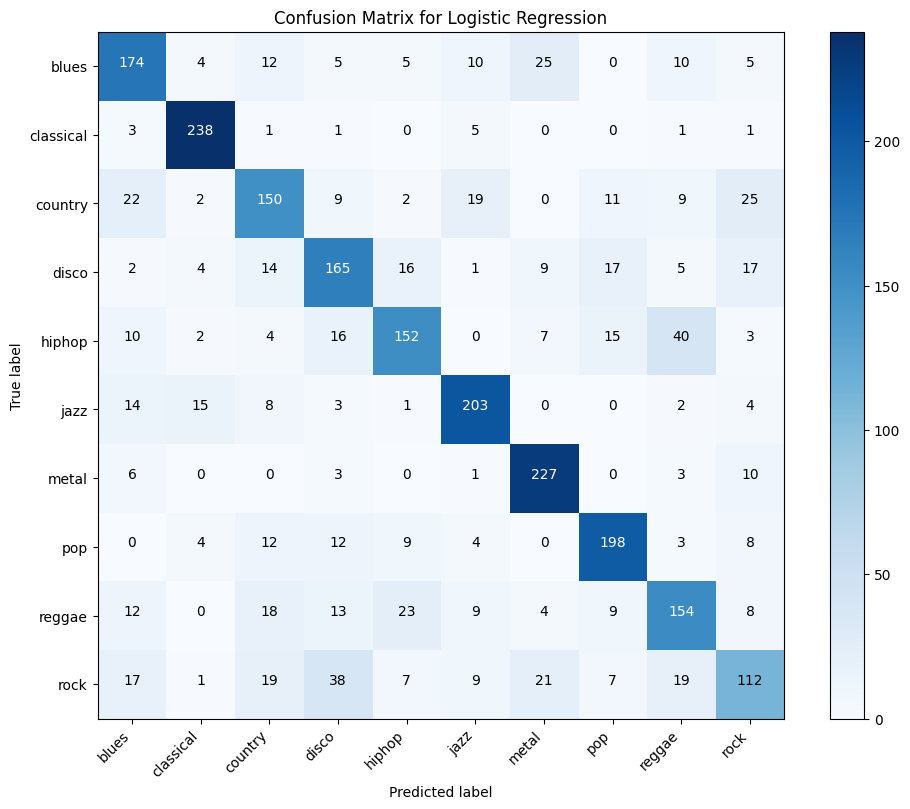

In [13]:
# Cell 9: Train and Evaluate Logistic Regression

# Ensure class_names are available from the encoder object created in Cell 5
if 'encoder' in globals() and encoder is not None:
    genre_class_names = encoder.classes_
else:
    # Fallback if encoder isn't available (should not happen if Cell 5 ran)
    # You might need to manually define this based on your label_mapping
    print("Warning: 'encoder' object not found. Using default numeric class names for report/matrix.")
    genre_class_names = [str(i) for i in range(len(np.unique(y_train)))] # e.g. ['0', '1', ..., '9']


log_reg_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42) # liblinear is good for smaller datasets, sag/saga for larger
# For multiclass, scikit-learn automatically handles One-vs-Rest (OvR) by default if solver supports it.

# Check if training data is available
if 'X_train_scaled' in locals() and X_train_scaled is not None:
    trained_log_reg, acc_log_reg = train_and_evaluate_model(
        log_reg_model, 
        X_train_scaled, y_train, 
        X_test_scaled, y_test, 
        model_name="Logistic Regression",
        class_names=genre_class_names
    )
else:
    print("ERROR: Training data (X_train_scaled) not found. Cannot train Logistic Regression.")

--- Training Support Vector Machine (SVC) ---
Training completed in 10.75 seconds.

--- Evaluating Support Vector Machine (SVC) on Test Set ---
Accuracy: 0.8503

Classification Report:
              precision    recall  f1-score   support

       blues       0.84      0.85      0.84       250
   classical       0.88      0.96      0.92       250
     country       0.83      0.77      0.80       249
       disco       0.79      0.82      0.81       250
      hiphop       0.92      0.84      0.88       249
        jazz       0.82      0.89      0.86       250
       metal       0.90      0.94      0.92       250
         pop       0.89      0.88      0.89       250
      reggae       0.84      0.85      0.84       250
        rock       0.78      0.71      0.74       250

    accuracy                           0.85      2498
   macro avg       0.85      0.85      0.85      2498
weighted avg       0.85      0.85      0.85      2498


Confusion Matrix:
Confusion matrix, without normalizati

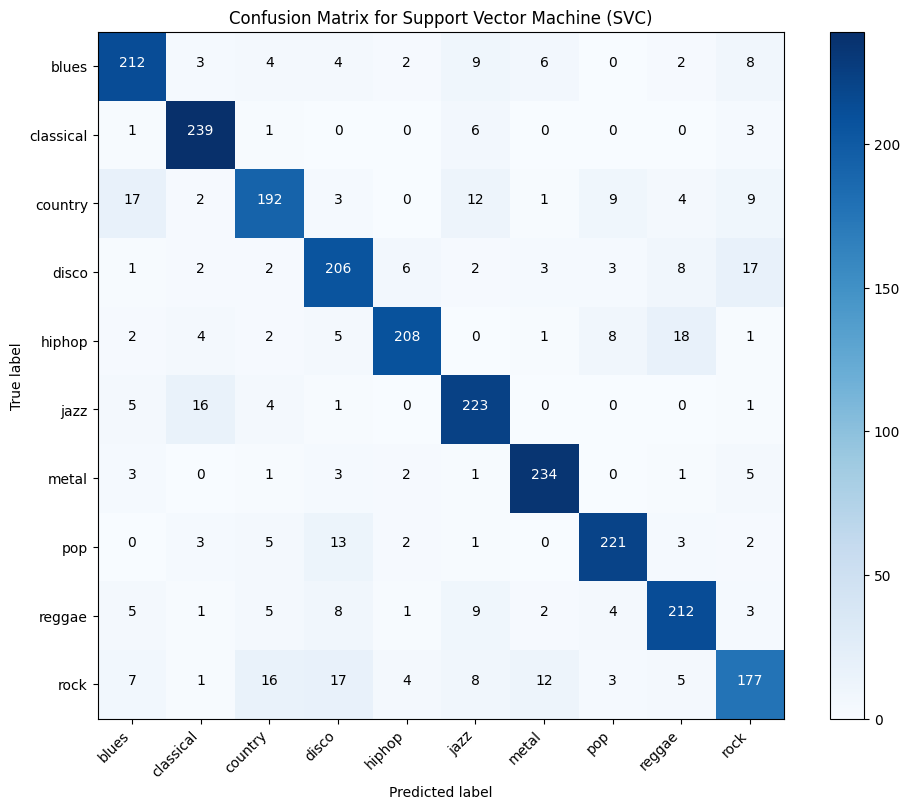

In [14]:
# Cell 10: Train and Evaluate Support Vector Machine (SVC)

# SVC can be slow, especially with many samples/features.
# A linear kernel might be faster as a start: kernel='linear'
# For non-linear, 'rbf' is common but slower. C is the regularization parameter.
svc_model = SVC(kernel='rbf', C=1.0, random_state=42, probability=True) # probability=True is slower but allows predict_proba
# If 'rbf' is too slow, try kernel='linear' first.

# Check if training data is available
if 'X_train_scaled' in locals() and X_train_scaled is not None:
    trained_svc, acc_svc = train_and_evaluate_model(
        svc_model, 
        X_train_scaled, y_train, 
        X_test_scaled, y_test, 
        model_name="Support Vector Machine (SVC)",
        class_names=genre_class_names # Re-using from previous cell
    )
else:
    print("ERROR: Training data (X_train_scaled) not found. Cannot train SVC.")

--- Training Random Forest Classifier ---
Training completed in 2.42 seconds.

--- Evaluating Random Forest Classifier on Test Set ---
Accuracy: 0.8591

Classification Report:
              precision    recall  f1-score   support

       blues       0.88      0.85      0.86       250
   classical       0.90      0.96      0.93       250
     country       0.78      0.84      0.81       249
       disco       0.83      0.86      0.84       250
      hiphop       0.98      0.84      0.90       249
        jazz       0.84      0.90      0.87       250
       metal       0.86      0.96      0.91       250
         pop       0.90      0.86      0.88       250
      reggae       0.78      0.84      0.81       250
        rock       0.87      0.69      0.77       250

    accuracy                           0.86      2498
   macro avg       0.86      0.86      0.86      2498
weighted avg       0.86      0.86      0.86      2498


Confusion Matrix:
Confusion matrix, without normalization


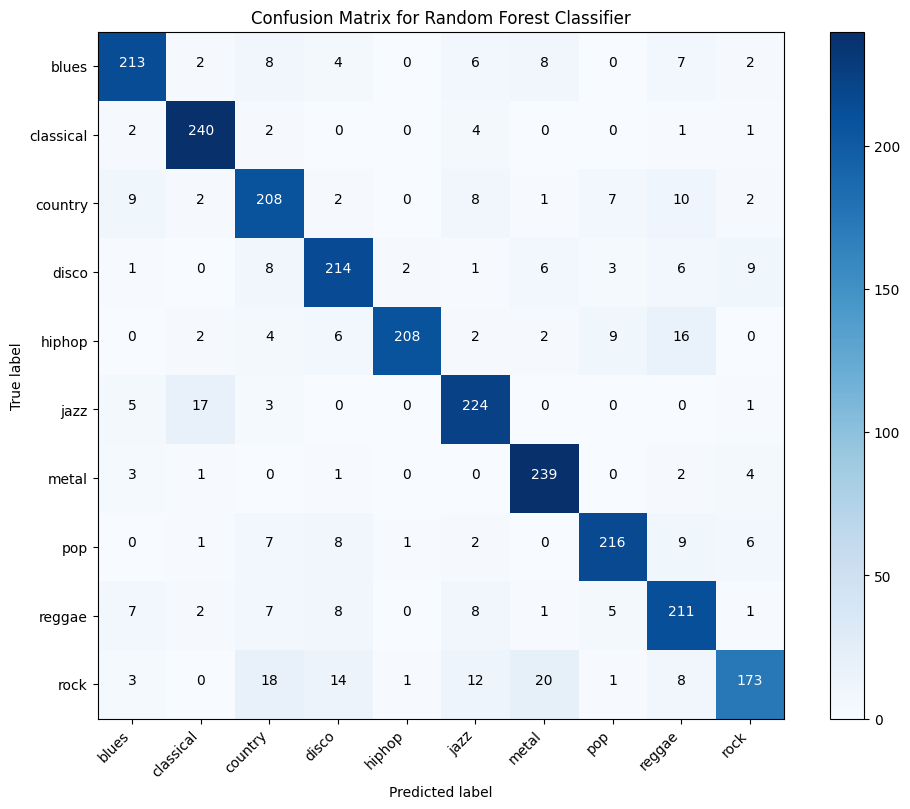

In [15]:
# Cell 11: Train and Evaluate Random Forest Classifier

# n_estimators is the number of trees in the forest.
# random_state for reproducibility.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores

# Check if training data is available
if 'X_train_scaled' in locals() and X_train_scaled is not None:
    trained_rf, acc_rf = train_and_evaluate_model(
        rf_model, 
        X_train_scaled, y_train, 
        X_test_scaled, y_test, 
        model_name="Random Forest Classifier",
        class_names=genre_class_names # Re-using from previous cell
    )
else:
    print("ERROR: Training data (X_train_scaled) not found. Cannot train Random Forest.")


Top 20 Most Important Features (Random Forest):
                    feature  importance
15             perceptr_var    0.051011
0          chroma_stft_mean    0.038029
2                  rms_mean    0.036862
3                   rms_var    0.035849
23               mfcc4_mean    0.034216
6   spectral_bandwidth_mean    0.030704
14            perceptr_mean    0.027239
17               mfcc1_mean    0.025975
8              rolloff_mean    0.025551
18                mfcc1_var    0.024649
13              harmony_var    0.023641
33               mfcc9_mean    0.022905
9               rolloff_var    0.022339
5     spectral_centroid_var    0.021214
27               mfcc6_mean    0.020582
12             harmony_mean    0.020372
26                mfcc5_var    0.020072
10  zero_crossing_rate_mean    0.019927
4    spectral_centroid_mean    0.019531
21               mfcc3_mean    0.019373


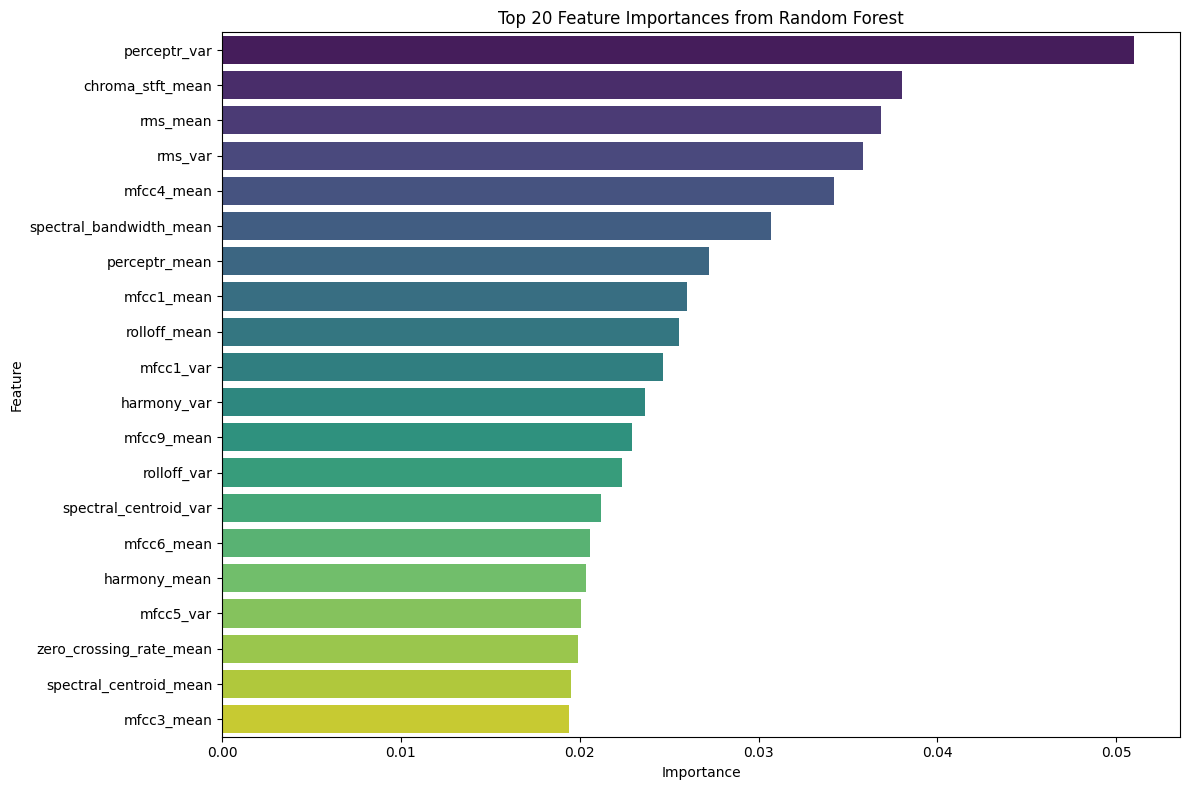

In [17]:
# Cell 12: Random Forest Feature Importances

if 'trained_rf' in locals() and trained_rf is not None and 'X' in locals() and X is not None:
    importances = trained_rf.feature_importances_
    feature_names = X.columns # Get feature names from the original X DataFrame (before scaling)
    
    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    
    # Sort by importance
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
    
    print("\nTop 20 Most Important Features (Random Forest):")
    print(feature_importance_df.head(20))
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    # Plotting only top 20 for clarity, you can plot more or all if desired
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), hue='feature', palette="viridis", legend=False)
    plt.title('Top 20 Feature Importances from Random Forest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
    
else:
    print("ERROR: 'trained_rf' (Random Forest model) or 'X' (feature DataFrame) not found. Cannot display feature importances.")

In [18]:
# Cell 13: Save Model, Scaler, Encoder, and Feature Columns

import pickle
import os # To check current working directory

# --- Verify Current Working Directory (Optional but good practice) ---
# This ensures files are saved where you expect them (your project root D:\Pjct1)
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")
print("Ensure this is your project root (e.g., D:\\Pjct1) where app.py will reside.")
print("If not, use os.chdir('path/to/your/project_root') before saving.")
print("-" * 30)


# --- 1. Save the Trained Random Forest Model ---
# Make sure 'trained_rf' is the variable name of your fitted Random Forest model from Cell 11
if 'trained_rf' in locals() and trained_rf is not None:
    model_filename = 'random_forest_genre_model.pkl'
    with open(model_filename, 'wb') as file: # 'wb' means "write binary"
        pickle.dump(trained_rf, file)
    print(f"SUCCESS: Random Forest model saved to -> {os.path.join(current_directory, model_filename)}")
else:
    print("ERROR: 'trained_rf' (Random Forest model) not found in notebook memory. Please run Cell 11 first.")


# --- 2. Save the Fitted Scaler ---
# Make sure 'scaler' is the variable name of your fitted StandardScaler from Cell 7
if 'scaler' in locals() and scaler is not None:
    scaler_filename = 'scaler.pkl'
    with open(scaler_filename, 'wb') as file:
        pickle.dump(scaler, file)
    print(f"SUCCESS: Scaler saved to -> {os.path.join(current_directory, scaler_filename)}")
else:
    print("ERROR: 'scaler' (StandardScaler object) not found. Please run Cell 7 first.")


# --- 3. Save the Fitted Label Encoder ---
# Make sure 'encoder' is the variable name of your fitted LabelEncoder from Cell 5
# Note: In some previous examples, I might have used 'label_encoder'. Check your Cell 5 definition.
# Let's assume it's 'encoder' as defined in Cell 5 of my previous full notebook guide.
if 'encoder' in locals() and encoder is not None:
    encoder_filename = 'encoder.pkl'
    with open(encoder_filename, 'wb') as file:
        pickle.dump(encoder, file)
    print(f"SUCCESS: Label encoder saved to -> {os.path.join(current_directory, encoder_filename)}")
else:
    print("ERROR: 'encoder' (LabelEncoder object) not found. Please run Cell 5 first to define and fit it.")
    print("       (If you named it 'label_encoder', please adjust the variable name in this cell).")


# --- 4. Save the Feature Column Order ---
# Make sure 'X' is the variable name of your features DataFrame *before* scaling, created in Cell 5
# (after dropping unnecessary columns and before splitting)
if 'X' in locals() and X is not None and isinstance(X, pd.DataFrame): # Check if X exists and is a DataFrame
    feature_columns_filename = 'feature_columns.pkl'
    feature_columns_ordered = X.columns.tolist() # Get column names in their current order
    
    if len(feature_columns_ordered) == 57: # Sanity check for expected number of features
        with open(feature_columns_filename, 'wb') as file:
            pickle.dump(feature_columns_ordered, file)
        print(f"SUCCESS: Feature column order saved to -> {os.path.join(current_directory, feature_columns_filename)}")
        print(f"         Number of columns saved: {len(feature_columns_ordered)}")
        # print(f"         First 5 columns: {feature_columns_ordered[:5]}") # Optional: print first few
    else:
        print(f"ERROR: Expected 57 feature columns in 'X', but found {len(feature_columns_ordered)}.")
        print(f"       Please verify the 'X' DataFrame from Cell 5. Columns found: {feature_columns_ordered}")
        
else:
    print("ERROR: DataFrame 'X' (features before scaling) not found or is not a DataFrame.")
    print("       Please ensure Cell 5 (where X is defined as `df.drop(columns=['label', 'label_encoded'])`) ran successfully.")

Current working directory: d:\Pjct1
Ensure this is your project root (e.g., D:\Pjct1) where app.py will reside.
If not, use os.chdir('path/to/your/project_root') before saving.
------------------------------
SUCCESS: Random Forest model saved to -> d:\Pjct1\random_forest_genre_model.pkl
SUCCESS: Scaler saved to -> d:\Pjct1\scaler.pkl
SUCCESS: Label encoder saved to -> d:\Pjct1\encoder.pkl
SUCCESS: Feature column order saved to -> d:\Pjct1\feature_columns.pkl
         Number of columns saved: 57
